In [4]:
import pandas as pd
from textblob import TextBlob

# Assuming 'product' is your DataFrame
# Replace the following line with loading your actual data into 'product'
# Sentiment Analysis Function
def sentimentAnalyzer(text):
    if pd.isna(text):
        return 0, 0, 'NaN'  # You can customize this for NaN values
    blob = TextBlob(str(text))
    #the polarity is (-1,1) the sbjectivity (0,1)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity

    # Determine the sentiment label based on polarity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    return sentiment_polarity, sentiment_subjectivity, sentiment_label

In [8]:
import pandas as pd

df = pd.read_csv("data.csv")

# review for one product
product = df[df["id"] == "AVqkIhwDv8e3D1O-lebb"]
product.head()

C:\Users\samas\AppData\Local\Temp\ipykernel_29452\386402769.py:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [9]:
#drop the unwanted cloumns 
product = product.drop(["categories", "asins", "keys", "manufacturer", "reviews.date", "reviews.dateAdded",
                            "reviews.dateSeen", "reviews.didPurchase", "reviews.doRecommend", "reviews.id",
                            "reviews.numHelpful", "reviews.sourceURLs",
                            "reviews.userCity", "reviews.userProvince", "reviews.username", "id"], axis=1)
product.head()

,name,brand,reviews.rating,reviews.text,reviews.title
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,This product so far has not disappointed. My c...,Kindle
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,great for beginner or experienced person. Boug...,very fast
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [10]:
# Print Product Name
print("Product Name:", product["name"][0])

# Print Number of Columns
print("Number of columns:", len(product.columns))

# Print Number of Rows
print("Number of rows:", len(product))

# Print Length of Shortest Review
min_review_length = min(len(str(review)) for review in product["reviews.text"] if pd.notna(review))
print("Length of shortest review:", min_review_length)

product.describe()


Product Name: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta
Number of columns: 5
Number of rows: 2814
Length of shortest review: 49


,reviews.rating
count,2814.000000
mean,4.586709
std,0.692333
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
# Apply Sentiment Analysis to "reviews.text" column
product[['polarity', 'subjectivity', 'sentiment']] = product["reviews.text"].apply(sentimentAnalyzer).apply(pd.Series)

# Display the DataFrame with new sentiment columns
product.head()

,name,brand,reviews.rating,reviews.text,reviews.title,polarity,subjectivity,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,This product so far has not disappointed. My c...,Kindle,0.325000,0.783333,Positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,great for beginner or experienced person. Boug...,very fast,0.800000,0.825000,Positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,0.600000,0.700000,Positive
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,0.374583,0.731250,Positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,0.368056,0.616226,Positive


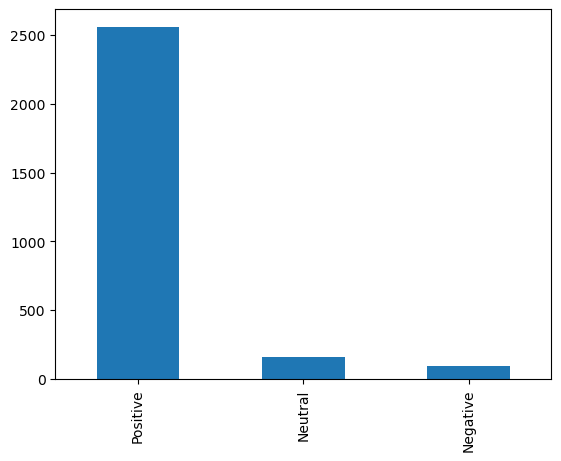

In [12]:
import matplotlib.pyplot as plt
product["sentiment"].value_counts().plot(kind="bar")
plt.show()

In [13]:
print("Positive reviews")
product[product["sentiment"] == 'Positive'].head()

Positive reviews


,name,brand,reviews.rating,reviews.text,reviews.title,polarity,subjectivity,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,This product so far has not disappointed. My c...,Kindle,0.325000,0.783333,Positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,great for beginner or experienced person. Boug...,very fast,0.800000,0.825000,Positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,0.600000,0.700000,Positive
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,0.374583,0.731250,Positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,0.368056,0.616226,Positive


In [14]:
print("negative reviews")
product[product["sentiment"] =='Negative'].head()

negative reviews


,name,brand,reviews.rating,reviews.text,reviews.title,polarity,subjectivity,sentiment
10,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,Not easy for elderly users cease of ads that p...,nice tablet for the price,-0.216667,0.833333,Negative
17,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,I really like this tablet. I would have given ...,Nice Tablet for the Price,-0.196875,0.400000,Negative
54,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,Got this for my wife and she loves it. She had...,My wife loves it.,-0.083333,0.583333,Negative
75,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,A family member has vision problems. They had ...,A gift for Grandma,-0.041667,1.000000,Negative
94,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,Good reader which is why I bought it. Ads are ...,"Good, not great",-0.050000,0.750000,Negative


In [27]:
# Print some insights
print("Number of positive reviews: " + str(len(product[product["sentiment"] == "Positive"])))
print("Number of negative reviews: " + str(len(product[product["sentiment"] == "Negative"])))
print("Number of neutral reviews: " + str(len(product[product["sentiment"] == "Neutral"])))

# Calculate average polarity
positive_reviews_polarity = product[product["sentiment"] == "Positive"]["reviews.text"].apply(lambda x: TextBlob(x).sentiment.polarity)
negative_reviews_polarity = product[product["sentiment"] == "Negative"]["reviews.text"].apply(lambda x: TextBlob(x).sentiment.polarity)

print("Average polarity of positive reviews: " + str(positive_reviews_polarity.mean()))
print("Average polarity of negative reviews: " + str(negative_reviews_polarity.mean()))

# Calculate average length
print("Average length of positive reviews: " + str(product[product["sentiment"] == "Positive"]["reviews.text"].apply(len).mean()))
print("Average length of negative reviews: " + str(product[product["sentiment"] == "Negative"]["reviews.text"].apply(len).mean()))


Number of positive reviews: 2561
Number of negative reviews: 94
Number of neutral reviews: 159
Average polarity of positive reviews: 0.4316361352573754
Average polarity of negative reviews: -0.17469354251934038
Average length of positive reviews: 154.76610698945726
Average length of negative reviews: 143.01063829787233


In [15]:
print("neutral reviews")
product[product["sentiment"] =='Neutral'].head()

neutral reviews


,name,brand,reviews.rating,reviews.text,reviews.title,polarity,subjectivity,sentiment
13,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Simply does everything I need. Thank youAnd si...,Excellect,0.0,0.357143,Neutral
30,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,If your looking for a affordable gift this is ...,looking for a great gift that is affordable.,0.0,0.000000,Neutral
42,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,Does all basic functions of a tablet. Hardcore...,Good starter tablet,0.0,0.125000,Neutral
58,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,My daughter likes this tablet to play her onli...,Present for my daughter & she loves it!,0.0,0.000000,Neutral
61,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,I bought this wanting for books comics and mov...,Great tablet for what it's worth,0.0,0.000000,Neutral


In [16]:
# Find examples where rating is more than 4 but sentiment is negative
falseNegative = product[(product["reviews.rating"] > 4) & (product["sentiment"] == "Negative")]

# Find examples where rating is less than 3 but sentiment is positive
falsePositive = product[(product["reviews.rating"] < 3) & (product["sentiment"] == "Positive")]

# reset indicies
falseNegative = falseNegative.reset_index(drop=True)
falsePositive = falsePositive.reset_index(drop=True)


falsePositive.head()


,name,brand,reviews.rating,reviews.text,reviews.title,polarity,subjectivity,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,2.0,Didn't have some of the features I was looking...,Wasn't for me,0.350000,0.300000,Positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,1.0,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,0.021759,0.465278,Positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,1.0,I bought this tablet for my 4 year old daughte...,Ended up returning,0.257143,0.353571,Positive
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,1.0,This Kindle is so overloaded with apps that I ...,Too may preloaded useless apps,0.111111,0.392222,Positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,1.0,I liked it at first except the browser is kind...,Broke in 5 mos,0.135124,0.494353,Positive


In [17]:
falseNegative.head()

,name,brand,reviews.rating,reviews.text,reviews.title,polarity,subjectivity,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,A family member has vision problems. They had ...,A gift for Grandma,-0.041667,1.000000,Negative
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Bought for my wife for X-mas and she loves it....,Great device,-0.155556,0.288889,Negative
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,This was a reasonable replacement for a broken...,Christmas gift,-0.100000,0.500000,Negative
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Out of all the tablet choices out there we buy...,Kindle Fire is best bang for buck,-0.125000,0.375000,Negative
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,"This is my third Kindle, I still have the othe...",Best Kindle owned,-0.041667,0.291667,Negative


In [19]:
# Print some insights
print("Number of false positives: " + str(len(falsePositive)))
print("Number of false negatives: " + str(len(falseNegative)))

# Calculate average polarity
false_positives_polarity = falsePositive["reviews.text"].apply(lambda x: TextBlob(x).sentiment.polarity)
false_negatives_polarity = falseNegative["reviews.text"].apply(lambda x: TextBlob(x).sentiment.polarity)

print("Average polarity of false positives: " + str(false_positives_polarity.mean()))
print("Average polarity of false negatives: " + str(false_negatives_polarity.mean()))

# Calculate average length
print("Average length of false positives: " + str(falsePositive["reviews.text"].apply(len).mean()))
print("Average length of false negatives: " + str(falseNegative["reviews.text"].apply(len).mean()))


Number of false positives: 34
Number of false negatives: 33
Average polarity of false positives: 0.20484986948629583
Average polarity of false negatives: -0.1845902056697511
Average length of false positives: 343.20588235294116
Average length of false negatives: 121.81818181818181


In [17]:
from textblob import TextBlob
example = falseNegative["reviews.text"][0]
print(example)
print("Sentiment analyzer: " + sentimentAnalyzer(example))
print("Polarity: " + str(textblob.TextBlob(example).sentiment.polarity))

print("""The reason why the sentiment analyzer failed is because it is not trained to understand the real feelings of someone who is joking.""")

A family member has vision problems. They had seen/used the Kindle of another family member - especially the ability to scale text. This device will make it possible to read, which she has had extreme difficulty doing.


TypeError: can only concatenate str (not "tuple") to str

In [29]:
# Take one example and explain why sentiment analyzer failed
example = falseNegative["reviews.text"][0]
print(example)
print("Sentiment analyzer: " + sentimentAnalyzer(example))
print("Polarity: " + str(textblob.TextBlob(example).sentiment.polarity))
print("""The reason why the sentiment analyzer failed is because it is not trained to understand the real feelings of someone who is joking.""")

A family member has vision problems. They had seen/used the Kindle of another family member - especially the ability to scale text. This device will make it possible to read, which she has had extreme difficulty doing.


TypeError: can only concatenate str (not "tuple") to str

In [30]:
example = falseNegative["reviews.text"][0]
print(example)

# Assuming sentimentAnalyzer returns a tuple, e.g., (sentiment, confidence)
sentiment_result = sentimentAnalyzer(example)
sentiment_str = f"Sentiment analyzer: {sentiment_result[0]}, Confidence: {sentiment_result[1]}"

print(sentiment_str)
print("Polarity: " + str(textblob.TextBlob(example).sentiment.polarity))
print("The reason why the sentiment analyzer failed is because it is not trained to understand the real feelings of someone who is joking.")


A family member has vision problems. They had seen/used the Kindle of another family member - especially the ability to scale text. This device will make it possible to read, which she has had extreme difficulty doing.
Sentiment analyzer: -0.041666666666666664, Confidence: 1.0


NameError: name 'textblob' is not defined

In [31]:
from textblob import TextBlob  # Import the TextBlob class

example = falseNegative["reviews.text"][0]
print(example)

# Assuming sentimentAnalyzer returns a tuple, e.g., (sentiment, confidence)
sentiment_result = sentimentAnalyzer(example)
sentiment_str = f"Sentiment analyzer: {sentiment_result[0]}, Confidence: {sentiment_result[1]}"

print(sentiment_str)
print("Polarity: " + str(TextBlob(example).sentiment.polarity))
print("The reason why the sentiment analyzer failed is because it is not trained to understand the real feelings of someone who is joking.")


A family member has vision problems. They had seen/used the Kindle of another family member - especially the ability to scale text. This device will make it possible to read, which she has had extreme difficulty doing.
Sentiment analyzer: -0.041666666666666664, Confidence: 1.0
Polarity: -0.041666666666666664
The reason why the sentiment analyzer failed is because it is not trained to understand the real feelings of someone who is joking.


In [32]:
# Export to csv
product.to_csv("product.csv")